# Project 1: Remote Work Effect on Mental Health
In this project, I'll be applying what I've learned on data preparation, exploration, cleaning, and visualization.

## Initial Exploration
To begin, the datatypes for all 20 columns will be shown to reveal a blend of `int64` and `object` datatypes. Details on the dataset are displayed, and a total of 2,825 missing data points are found in two columns. A heatmap visualizes the missing data. Then, the head of the dataset is shown.


----------| Datatypes |----------
Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                         object
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                    object
Sleep_Quality                        object
Region                               object
dtype: object

----------| Rows |----------
5000

----------| Columns |----------
20


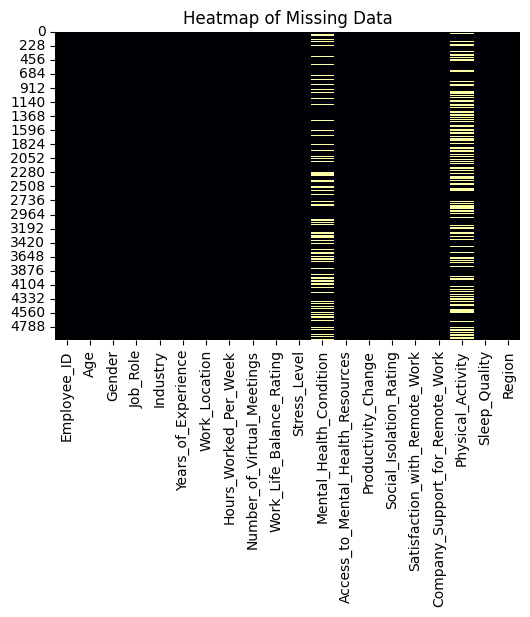

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# for formatting
headline1 = "\n----------|"
headline2 = "|----------\n"

data = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# to print datatypes
print(f"{headline1} Datatypes {headline2}{data.dtypes}")

# # of rows
print(f"{headline1} Rows {headline2}{len(data.axes[0])}")

# # of columns
print(f"{headline1} Columns {headline2}{len(data.axes[1])}")

# # of missing values
print(f"{headline1} Missing Data Count {headline2}{data.isnull().sum()}")

# heatmap of missing values
plt.figure(figsize=(6,4))
sns.heatmap(data.isnull(), cbar=False, cmap="inferno")
plt.title("Heatmap of Missing Data")
plt.show()

In [2]:
# display first few rows, in its own codeblock to accomodate a Jupyter formatting issue
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


## Summary Statistics
The summary statistics for numerical variables is shown, and for categorical variables, frequency count of unique categories is shown.

In [3]:
# for loop to go through each column and display numerical statistics or categorical statistics
for column in data.columns:
    if data[column].dtype == 'int64':
        print(f"{headline1} {column} {headline2}")
        print(f"median: {data[column].median()}") # median added to .describe since it was specified in project instructions
        print(data[column].describe())
    else:
        print(f"{headline1} {column} {headline2}")
        print(data[column].value_counts())



----------| Employee_ID |----------

Employee_ID
EMP5000    1
EMP0001    1
EMP0002    1
EMP0003    1
EMP0004    1
          ..
EMP0012    1
EMP0013    1
EMP0014    1
EMP0015    1
EMP0016    1
Name: count, Length: 5000, dtype: int64

----------| Age |----------

median: 41.0
count    5000.000000
mean       40.995000
std        11.296021
min        22.000000
25%        31.000000
50%        41.000000
75%        51.000000
max        60.000000
Name: Age, dtype: float64

----------| Gender |----------

Gender
Female               1274
Male                 1270
Prefer not to say    1242
Non-binary           1214
Name: count, dtype: int64

----------| Job_Role |----------

Job_Role
Project Manager      738
Sales                733
Designer             723
HR                   716
Software Engineer    711
Data Scientist       696
Marketing            683
Name: count, dtype: int64

----------| Industry |----------

Industry
Finance          747
IT               746
Healthcare       728
Retail  

## Handling Missing Data
Two columns in the dataset contain missing data, `Mental_Health_Condition` and `Physical_Activity`.
I'll be using imputation to fill these missing values since there are 2,825 missing values and removal would mean losing half my dataset.
These are both string columns, so to fill them, I'll be using their column's mode values.


----------| Mental Health Condition Mode |----------
Burnout

----------| Physical Activity Mode |----------
Weekly


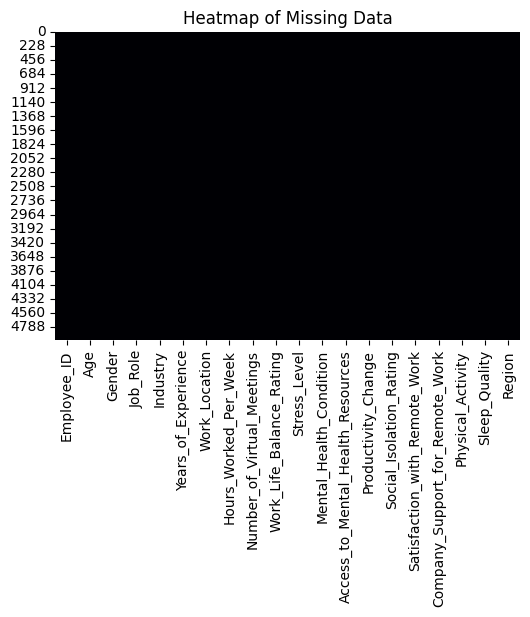

In [4]:
# printing modes of both categorical columns
print(f"{headline1} Mental Health Condition Mode {headline2}{data['Mental_Health_Condition'].mode()[0]}")
print(f"{headline1} Physical Activity Mode {headline2}{data['Physical_Activity'].mode()[0]}")

filled_data = data.copy()

# filling missing values
filled_data['Mental_Health_Condition'] = filled_data['Mental_Health_Condition'].fillna(data['Mental_Health_Condition'].mode()[0])
filled_data['Physical_Activity'] = filled_data['Physical_Activity'].fillna(data['Physical_Activity'].mode()[0])

# heatmap to confirm values are filled
plt.figure(figsize=(6,4))
sns.heatmap(filled_data.isnull(), cbar=False, cmap="inferno")
plt.title("Heatmap of Missing Data")
plt.show()


## Outlier Detection
A box plot will be used for each numerical column to find evidence of outliers.

As seen below, none of the numerical columns have outliers, so there is no need to describe and perform an outlier removal strategy.

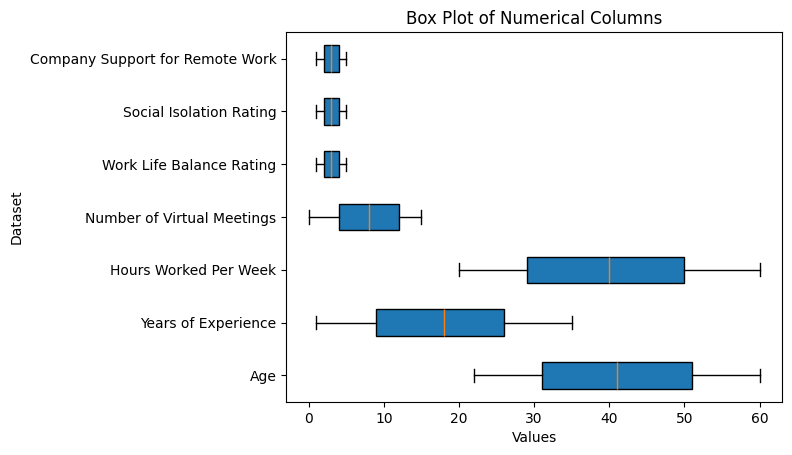

In [5]:
# box plot of each numerical column to find outliers
plt.boxplot([
    filled_data['Age'],
    filled_data['Years_of_Experience'],
    filled_data['Hours_Worked_Per_Week'],
    filled_data['Number_of_Virtual_Meetings'],
    filled_data['Work_Life_Balance_Rating'],
    filled_data['Social_Isolation_Rating'],
    filled_data['Company_Support_for_Remote_Work']],
    patch_artist=True, vert=False)
plt.gca().set_yticklabels(['Age',
                           'Years of Experience',
                           'Hours Worked Per Week',
                           'Number of Virtual Meetings',
                           'Work Life Balance Rating',
                           'Social Isolation Rating',
                           'Company Support for Remote Work'])

plt.title('Box Plot of Numerical Columns')
plt.ylabel('Dataset')
plt.xlabel('Values')
plt.show()

## Feature Engineering
Before visualizing any data, columns and datatypes are engineered for future use.

In [6]:
# creating correlation matrix for later
numerical_filled_data = filled_data.drop(columns=[
    'Employee_ID',
    'Gender',
    'Job_Role',
    'Industry',
    'Work_Location',
    'Stress_Level',
    'Mental_Health_Condition',
    'Access_to_Mental_Health_Resources',
    'Productivity_Change',
    'Satisfaction_with_Remote_Work',
    'Physical_Activity',
    'Sleep_Quality',
    'Region',
    ])

# correlation matrix
corr_matrix = numerical_filled_data.corr()

################################ Age Binning ################################

# age binning
def age_cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 0) and (x <= 20):
            bins[idx] = 1
        elif (x >= 21) and (x <= 30):
            bins[idx] = 2
        elif (x >= 31) and (x <= 40):
            bins[idx] = 3
        elif (x >= 41) and (x <= 50): 
            bins[idx] = 4
        elif (x >= 51) and (x <= 60):  
            bins[idx] = 5
        else:
            bins[idx] = 6  # 61 and above
    return bins


# makes a numeric column of binned ages
binned_ages_numeric = age_cut(filled_data['Age'].to_numpy())
filled_data.insert(20, "binned_ages_numeric", binned_ages_numeric)


# prepares converting numeric binned ages to categorical
conversion_dict = {1: '0 to 20',
                   2: '21 to 30',
                   3: '31 to 40',
                   4: '41 to 50',
                   5: '51 to 60',
                   6: '61+'}
age_order = ['0 to 20', '21 to 30', '31 to 40', '41 to 50', '51 to 60', '61+']

binned_ages_categorical = list(map(conversion_dict.get, binned_ages_numeric))
filled_data.insert(21, "binned_ages_categorical", binned_ages_categorical)

# reorders categorical bins to make sense in legend
filled_data['binned_ages_categorical'] = pd.Categorical(filled_data['binned_ages_categorical'], categories=age_order, ordered=True)


################################ Categorical to Numerical Conversions ################################

# stress level
filled_data['Stress_Level_Num'] = filled_data['Stress_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

# mental health condition
filled_data['Mental_Health_Condition_Num'] = filled_data['Mental_Health_Condition'].map({
    'None': 0, 'Anxiety': 1, 'Burnout': 2, 'Depression': 3})

# productivity change
filled_data['Productivity_Change_Num'] = filled_data['Productivity_Change'].map({
    'Decrease': -1, 'No Change': 0, 'Increase': 1})

# satisfaction with remote work
filled_data['Satisfaction_with_Remote_Work_Num'] = filled_data['Satisfaction_with_Remote_Work'].map({
    'Unsatisfied': -1, 'Neutral': 0, 'Satisfied': 1})

# sleep quality
filled_data['Sleep_Quality_Num'] = filled_data['Sleep_Quality'].map({
    'Poor': -1, 'Average': 0, 'Good': 1})

# physical activity
filled_data['Physical_Activity_Num'] = filled_data['Sleep_Quality'].map({
    'None': 0, 'Weekly': 1, 'Daily': 7})



#### Post-Feature Engineering Summary Statistics
The new summary statistics are shown below after doing some feature engineering and conversions.

Interesting highlights include:

**Stress Level Mean** *(1 = Low, 2 = Medium, 3 = High)*: 2.008200
**Productivity Change Mean** *(-1 = Decrease, 0 = No Change, 1 = Increase)*: -0.030200
**Satisfaction with Remote Work Mean** *(-1 = Unsatisfied, 0 = Neutral, 1 = Satisfied)*: -0.000400

These show us that overall, surveyors were slightly stressed, had a slightly negative productivity change after switching to remote work, and were practically neutral about their satisfaction with remote work.


In [19]:
# new summary statistics after filling data and adding converting some categorical columns to numerical

# for loop to go through each column and display numerical statistics or categorical statistics
for column in filled_data.columns:
    if filled_data[column].dtype == 'int64':
        print(f"{headline1} {column} {headline2}")
        print(f"median: {filled_data[column].median()}") # median added to .describe since it was specified in project instructions
        print(filled_data[column].describe())
    else:
        print(f"{headline1} {column} {headline2}")
        print(filled_data[column].value_counts())


----------| Employee_ID |----------

Employee_ID
EMP5000    1
EMP0001    1
EMP0002    1
EMP0003    1
EMP0004    1
          ..
EMP0012    1
EMP0013    1
EMP0014    1
EMP0015    1
EMP0016    1
Name: count, Length: 5000, dtype: int64

----------| Age |----------

median: 41.0
count    5000.000000
mean       40.995000
std        11.296021
min        22.000000
25%        31.000000
50%        41.000000
75%        51.000000
max        60.000000
Name: Age, dtype: float64

----------| Gender |----------

Gender
Female               1274
Male                 1270
Prefer not to say    1242
Non-binary           1214
Name: count, dtype: int64

----------| Job_Role |----------

Job_Role
Project Manager      738
Sales                733
Designer             723
HR                   716
Software Engineer    711
Data Scientist       696
Marketing            683
Name: count, dtype: int64

----------| Industry |----------

Industry
Finance          747
IT               746
Healthcare       728
Retail  

## Data Visualizations
#### Frequency by Industry
This histogram shows frequency count by industry.

The y-axis limit is changed to 600-760 to make the visualization easier to read. This shows a mode in Finance for this dataset, with the lowest frequency being in Consulting.

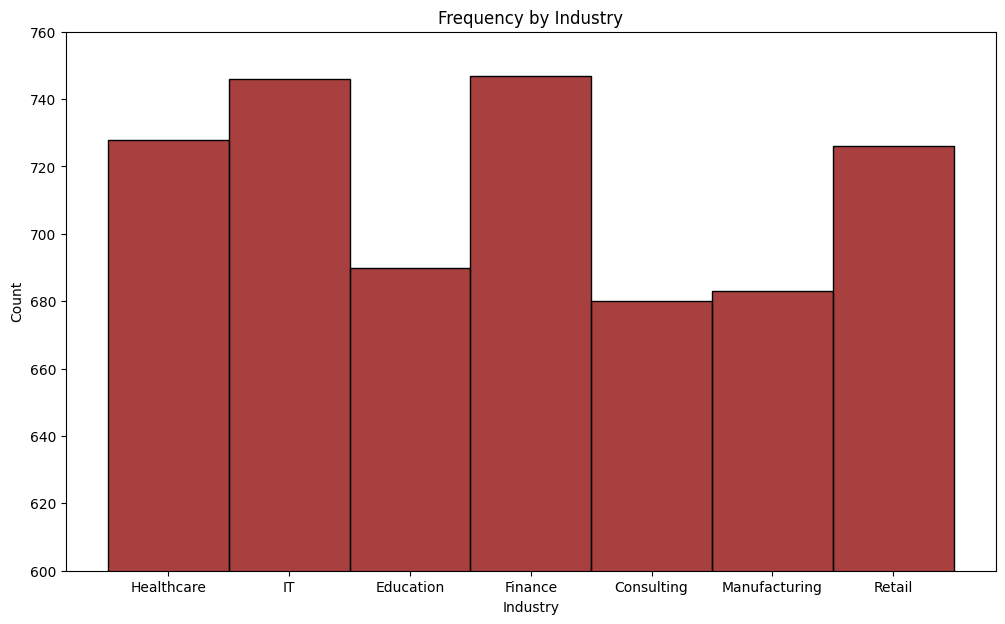

In [7]:
# histogram of frequency by industry
plt.figure(figsize=(12,7))
fig = sns.histplot(data=filled_data, x='Industry', color='darkred')
fig.set_ylim(600,760)
fig.set_title("Frequency by Industry")
plt.show()

#### Stress Level by Job Role
This bar graph shows stress level by job role across all industries.

Stress level is measured between 1 and 3 (1 = Low, 2 = Medium, 3 = High) but is converted to numerical.

The graph has its y-axis limited between 1.7 and 2.1 for readability. Each bar is labeled with its value.

We can see the job role with the highest stress level are Project Managers, and the job role with the lowest stress level is the HR department.

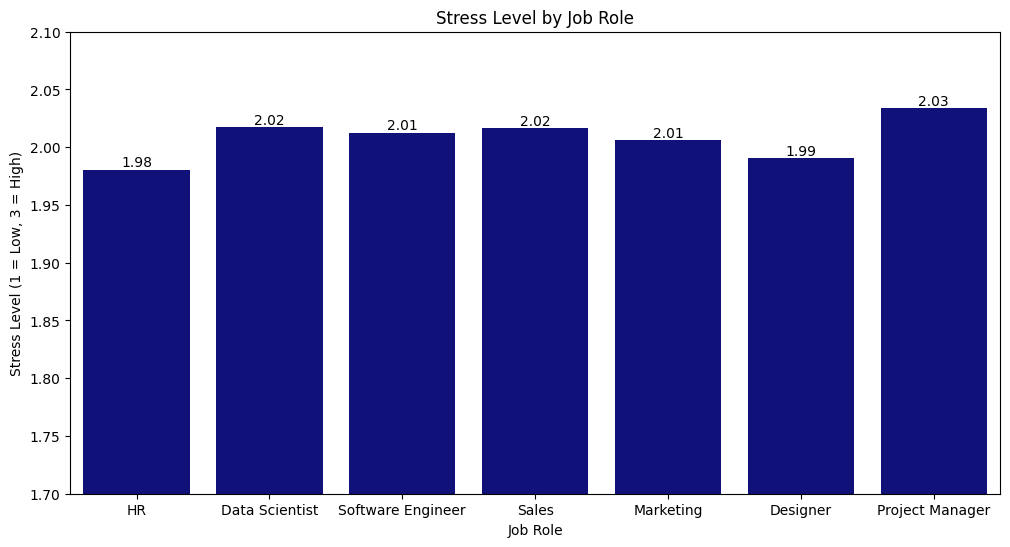

In [17]:
# stress level by job role
plt.figure(figsize=(12,6))

fig = sns.barplot(data=filled_data, x='Job_Role', y='Stress_Level_Num', errorbar=None, color='darkblue')
fig.set_ylim(1.7, 2.1)
plt.title("Stress Level by Job Role")
fig.set_ylabel("Stress Level (1 = Low, 3 = High)")
fig.set_xlabel("Job Role")

# labels
for i in fig.containers:
    fig.bar_label(i, fmt='%.2f')

plt.show()


#### Social Isolation by Region, with Access to Mental Health Resources
This graph is split across regions and shows a self-reported metric of social isolation rating (1 through 5, 5 being the most isolated), with a hue for Access to Mental Health Resources.

As shown, the greatest difference between social isolation rating in respect to surveyor's access to mental health resources is in Africa, but the social isolation rating is counterintuitive. In this dataset, individuals *with* access to mental health resources felt significantly more isolated.

This phenomenon is only observed in Africa and Europe. For all other regions, individuals with access to mental health resources feel less socially isolated.



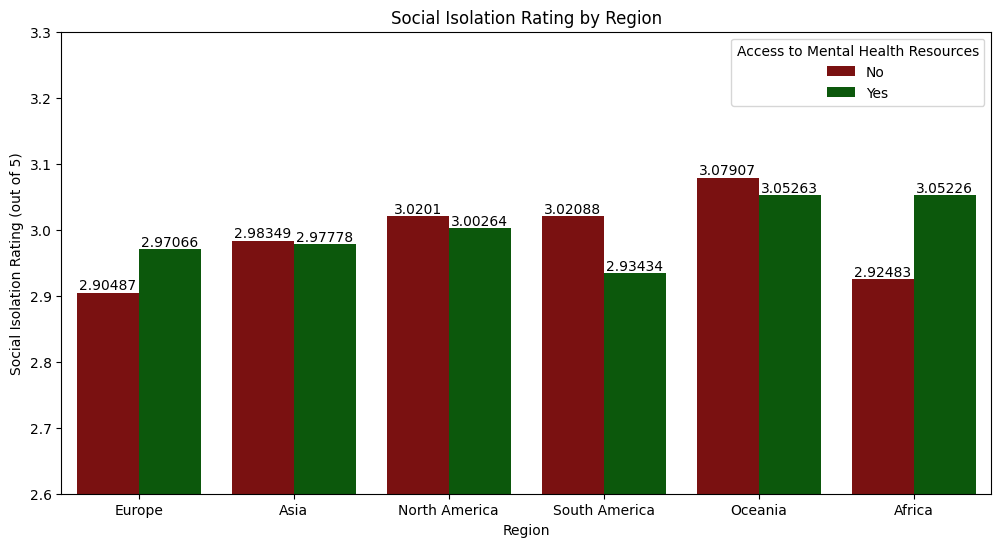

In [8]:
# social isolation by region with access to mental health resources

# stress level as integers
def stress_level_num(arr):
    for idx, x in enumerate(arr):
        if x == "Low":
            idx = 1
        elif x == "Medium":
            idx = 2
        else:
            idx == 3

# data split by regions
africa_data = filled_data[filled_data['Region'] == 'Africa']
asia_data = filled_data[filled_data['Region'] == 'Asia']
europe_data = filled_data[filled_data['Region'] == 'Europe']
oceania_date = filled_data[filled_data['Region'] == 'Oceania']
north_america_data = filled_data[filled_data['Region'] == 'North America']
south_america_data = filled_data[filled_data['Region'] == 'South America']


plt.figure(figsize=(12,6))

fig = sns.barplot(data=filled_data, x='Region', y='Social_Isolation_Rating',
                  hue='Access_to_Mental_Health_Resources', errorbar=None, palette=['darkred', 'darkgreen'])
fig.set_ylim(2.6, 3.3)
fig.bar_label(fig.containers[0], fontsize=10)
fig.bar_label(fig.containers[1], fontsize=10)
plt.title("Social Isolation Rating by Region")
plt.ylabel("Social Isolation Rating (out of 5)")
plt.legend(title="Access to Mental Health Resources")
plt.show()


#### Industry & Job Role vs. QOL Metrics
Four heatmaps are shown below observing industry and job roles against a heatmap of certain parameters.

**Stress Level by Industry and Job Role**: This graph shows stress level *(1 = Low, 2 = Medium, 3 = High)* across industries and job roles. The combination with the highest stress level is Marketing in Education. Education and Healthcare across all job roles can be observed to have relatively high stress levels, while IT seems to have the lowest across industries, and HR has the lowest across job roles.

**Satisfaction with Remote work by Industry and Job Role**: This graph shows satisfaction with remote work *(-1 = Unsatisfied, 0 = Neutral, 1 = Satisfied)* across industries and job roles. The highest satisfaction is with the HR department in Healthcare, and the most dissatisfied being equally Designers in IT and Marketing in Manufacturing.

**Sleep Quality by Industry and Job Role**: This graph shows sleep quality *(-1 = Poor, 0 = Average, 1 = Good)* across industries and job roles. Sleep quality across the heatmap doesn't seem particularly high, but the highest is with Software Engineers in Manufacturing, and the worst sleep quality is with Project Managers in Manufacturing. The worst sleep quality can be found in Project Managers across all industries.

**Productivity Change by Industry and Job Role**: This graph shows productivity change after switching to remote work *(-1 = Decrease, 0 = No Change, 1 = Increase)*, across industries and job roles. The most satisfied group is the HR Department in Healthcare, and the least satisfied is equally Designers in Finance and in Education. Interestingly, Software Engineers across industries seem among the more satisfied job roles, along with Data Scientists, except for in the Education industry, which is the most unsatisfied.

Additionally, the HR department in healthcare had the mode in both satisfaction with remote work and productivity change after switch to remote work.

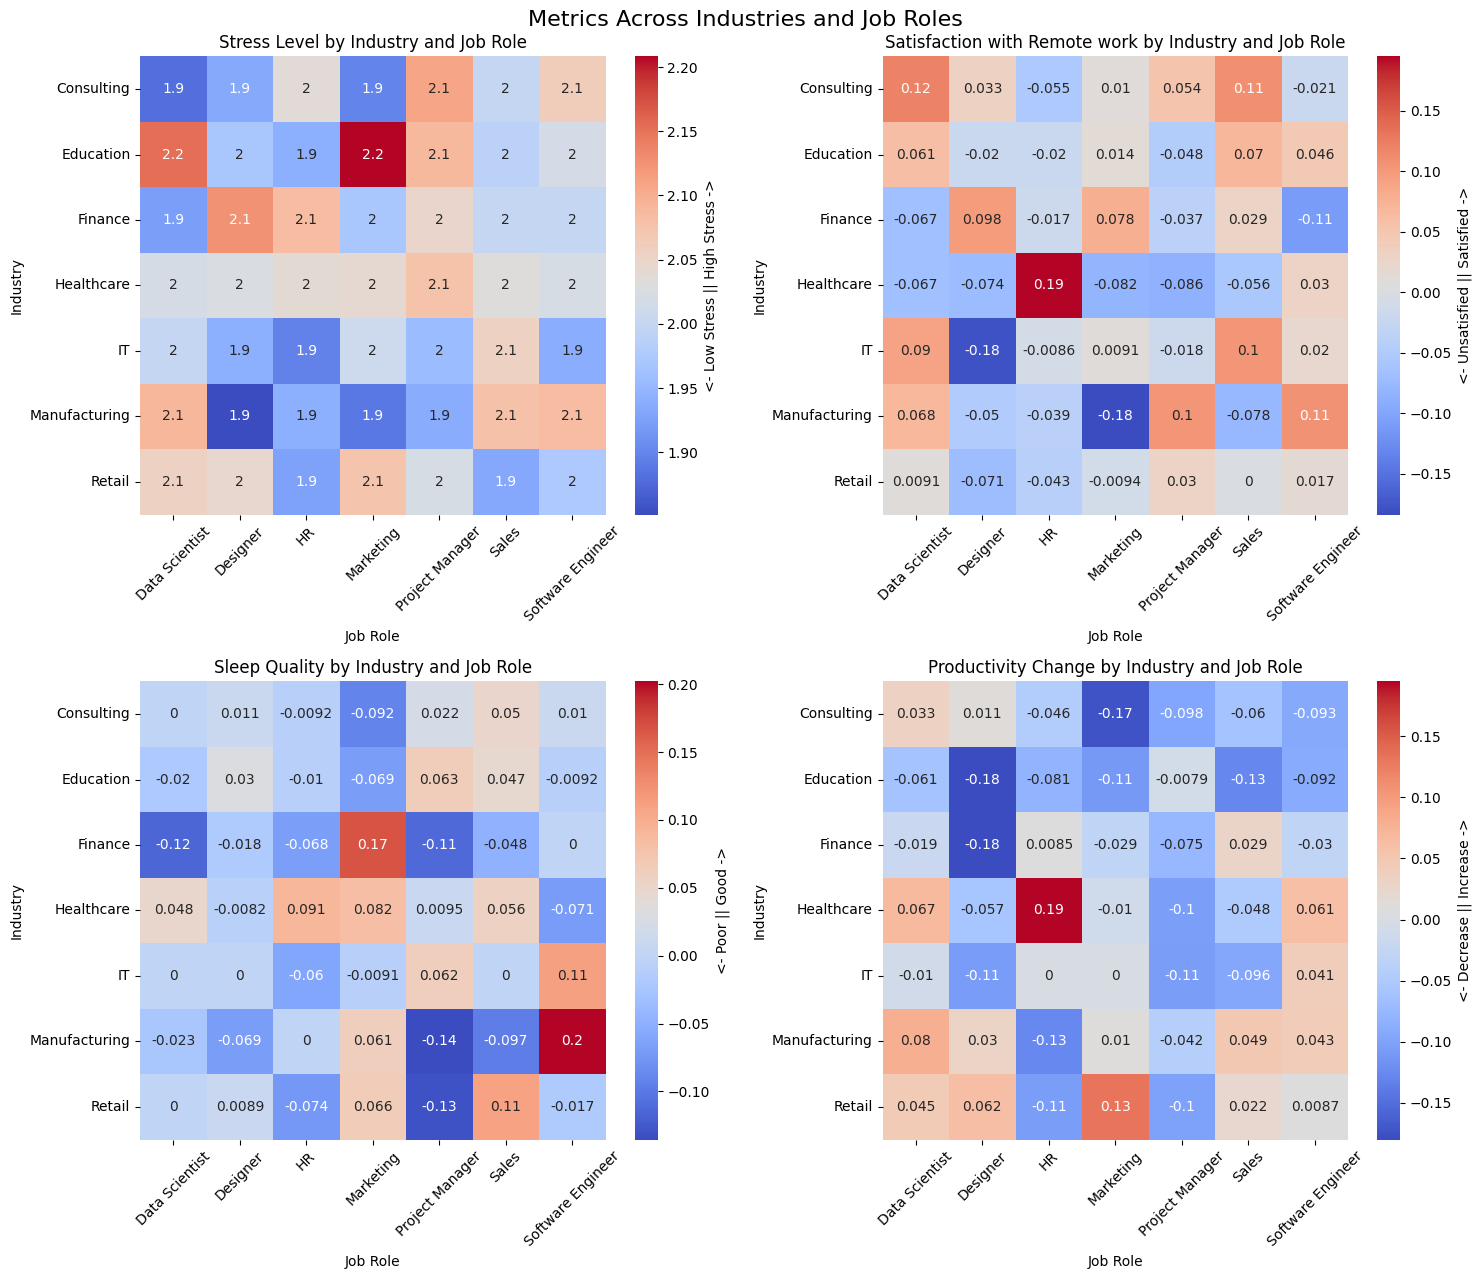

In [11]:
# industry v. job role v. certain parameter heatmaps

fig, axs = plt.subplots(2, 2, figsize=(15, 13))

# industry and job role by stress level
ivjr_v_stress = filled_data.pivot_table(index='Industry', columns='Job_Role', values='Stress_Level_Num')
sns.heatmap(ivjr_v_stress, annot=True, cmap='coolwarm', ax=axs[0, 0],
            cbar_kws={'label': '<- Low Stress || High Stress ->'})
axs[0,0].set_title("Stress Level by Industry and Job Role")
axs[0,0].set_xlabel("Job Role")
axs[0,0].set_ylabel("Industry")
axs[0,0].tick_params(axis='x', rotation=45)

# industry and job role by satisfaction with remote work
ivjr_v_satisfaction = filled_data.pivot_table(index='Industry', columns='Job_Role', values='Satisfaction_with_Remote_Work_Num')
sns.heatmap(ivjr_v_satisfaction, annot=True, cmap='coolwarm', ax=axs[0, 1],
            cbar_kws={'label': '<- Unsatisfied || Satisfied ->'})
axs[0,1].set_title("Satisfaction with Remote work by Industry and Job Role")
axs[0,1].set_xlabel("Job Role")
axs[0,1].set_ylabel("Industry")
axs[0,1].tick_params(axis='x', rotation=45)

# industry and job role by sleep quality
ivjr_v_sleep = filled_data.pivot_table(index='Industry', columns='Job_Role', values='Sleep_Quality_Num')
sns.heatmap(ivjr_v_sleep, annot=True, cmap='coolwarm', ax=axs[1,0],
            cbar_kws={'label': '<- Poor || Good ->'})
axs[1,0].set_title("Sleep Quality by Industry and Job Role")
axs[1,0].set_xlabel("Job Role")
axs[1,0].set_ylabel("Industry")
axs[1,0].tick_params(axis='x', rotation=45)

# industry and job role by productivity change
ivjr_v_prod = filled_data.pivot_table(index='Industry', columns='Job_Role', values='Productivity_Change_Num')
sns.heatmap(ivjr_v_prod, annot=True, cmap='coolwarm', ax=axs[1,1],
            cbar_kws={'label': '<- Decrease || Increase ->'})
axs[1,1].set_title("Productivity Change by Industry and Job Role")
axs[1,1].set_xlabel("Job Role")
axs[1,1].set_ylabel("Industry")
axs[1,1].tick_params(axis='x', rotation=45)

# figure displaying
fig.suptitle("Metrics Across Industries and Job Roles", fontsize=16)
plt.tight_layout()
plt.show()

## Correlation Matrix
The correlation across numerical columns overall is very weak. The min and max for this correlation matrix has been fixed to increase readability.

With increased reability, we find the strongest correlation is found in Age and Company Support for Remote Work, followed up by Years of Experience and Number of Virtual Meetings. It makes sense that senior employees would be called to more meetings as they're more likely to assume managerial positions.
The next strongest correlation of note is between Age and Work Life Balance Rating.

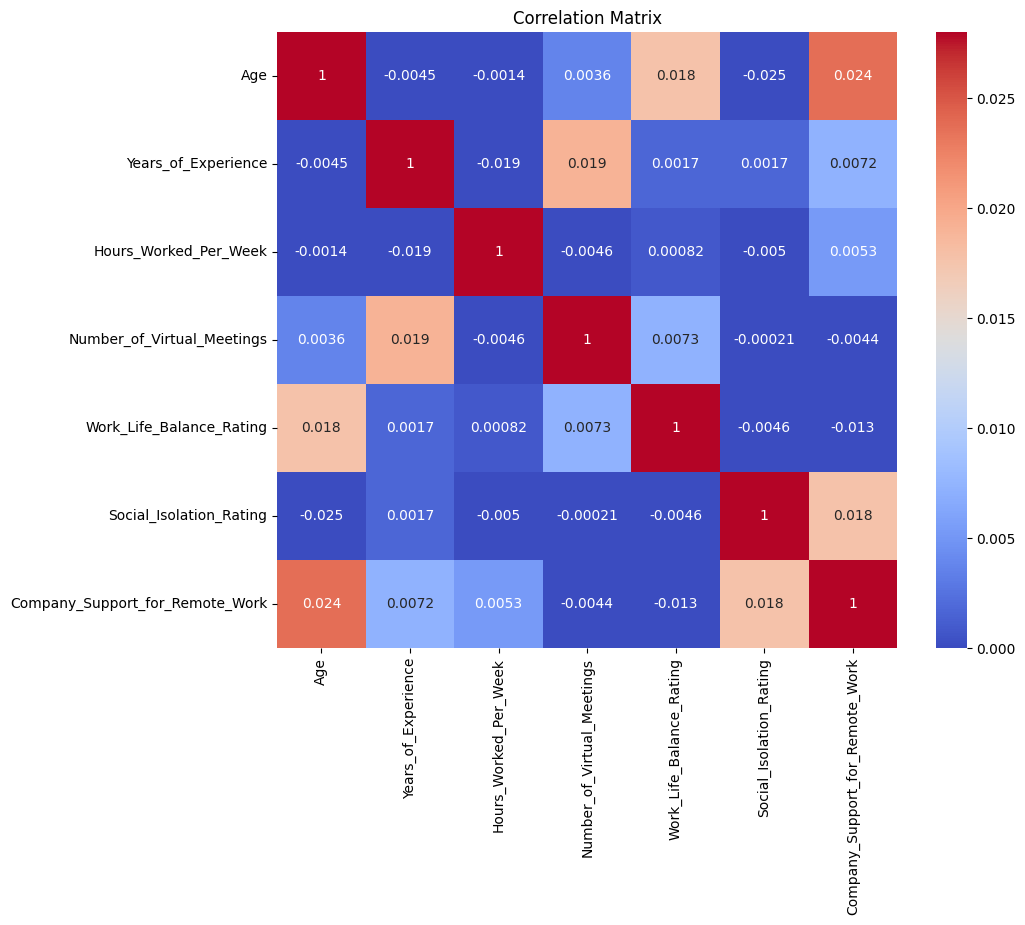

In [12]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin='0', vmax='0.028')
plt.title('Correlation Matrix')
plt.show()


## Conclusion & Insights
This dataset was gathered as survey data and features a wealth of categorical data as well as 'sliding scale' or data from 1 to 5. This limited available graphing options to histograms, bar graphs, and heatmaps, as graphs like scatter plots wouldn't make sense with data ranging from 1 to 5. Another oddity discovered was in the distribution of age ranges in the dataset, ages aren't equally distributed, there's an odd multimodal frequency count on age that I hadn't observed in other datasets. It may be a result of a dataset of n=5000.

As the revised summary statistics showed, there isn't a strong concensus on remote work's impact on mental health, but impacts do start appearing when looking at specific job roles, industries, and regions.